In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
training_set = pd.read_csv('/content/detect_dataset.csv')
classification_set = pd.read_csv('/content/classData.csv')

In [ ]:
training_set.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [ ]:
len(training_set.iloc[:,0])
output = training_set.iloc[:,0].values

In [ ]:
count = 0;
for i in range(0,len(training_set.iloc[:,0])):
  if output[i] == 0:
    count +=1;

In [ ]:
print(count)

6505


In [ ]:
classification_set.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc  
0 -0.267815  
1 -0.189099  
2 -0.151428  
3 -0.130570  
4 -0.113983

In [ ]:
classification_set.tail()

G  C  B  A         Ia         Ib         Ic        Va        Vb  \
7856  0  0  0  0 -66.237921  38.457041  24.912239  0.094421 -0.552019   
7857  0  0  0  0 -65.849493  37.465454  25.515675  0.103778 -0.555186   
7858  0  0  0  0 -65.446698  36.472055  26.106554  0.113107 -0.558211   
7859  0  0  0  0 -65.029633  35.477088  26.684731  0.122404 -0.561094   
7860  0  0  0  0 -64.598401  34.480799  27.250065  0.131669 -0.563835   

            Vc  
7856  0.457598  
7857  0.451407  
7858  0.445104  
7859  0.438690  
7860  0.432166

training_set is to train the model to detect any type of Flaut and
classification_set is for Classification of Shunt Faults.

In [ ]:

print(f"The Detect Dataset has {training_set.shape[0]} rows and {training_set.shape[1]} columns.")

print(f"The Dataset to be classified has {classification_set.shape[0]} rows and {classification_set.shape[1]} columns.")

The Detect Dataset has 12001 rows and 9 columns.
The Dataset to be classified has 7861 rows and 10 columns.


In [ ]:
# Dropping the last 2 columns from training_set dataset.
training_set = training_set.drop(training_set[['Unnamed: 7', 'Unnamed: 8']],axis=1)
training_set.head()

Output (S)          Ia        Ib          Ic        Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050

# **Lets have a quick look on data types and values of our dataset**

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [ ]:
classification_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


We do not have any null values in our dataset. Thus, we can proceed.


In [ ]:
training_set.describe()

Output (S)            Ia            Ib            Ic            Va  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.457962      6.709369    -26.557793     22.353043      0.010517   
std        0.498250    377.158470    357.458613    302.052809      0.346221   
min        0.000000   -883.542316   -900.526951   -883.357762     -0.620748   
25%        0.000000    -64.348986    -51.421937    -54.562257     -0.237610   
50%        0.000000     -3.239788      4.711283     -0.399419      0.002465   
75%        1.000000     53.823453     69.637787     45.274542      0.285078   
max        1.000000    885.738571    889.868884    901.274261      0.609864   

                 Vb            Vc  
count  12001.000000  12001.000000  
mean      -0.015498      0.004980  
std        0.357644      0.349272  
min       -0.659921     -0.612709  
25%       -0.313721     -0.278951  
50%       -0.007192      0.008381  
75%        0.248681      0.289681  
max        0.627875      0.608243

In [ ]:
classification_set.describe()

G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  
min    -900.526951  -883.357762    -0.620748    -0.608016    -0.612709  
25%    -271.845947   -61.034219    -0.130287    -0.159507    -0.215977  
50%       5.513317    -4.326711    -0.005290     0.001620     0.009281  
75%      91.194282    49.115141     0.111627     0.153507     0.239973  
max     889.868884   901.274261     0.595342     0.627875     0.600179

In [ ]:
# Normalisation of Dataset will be required as values vary significantly from each other


In [ ]:
training_set.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

For Current Ia



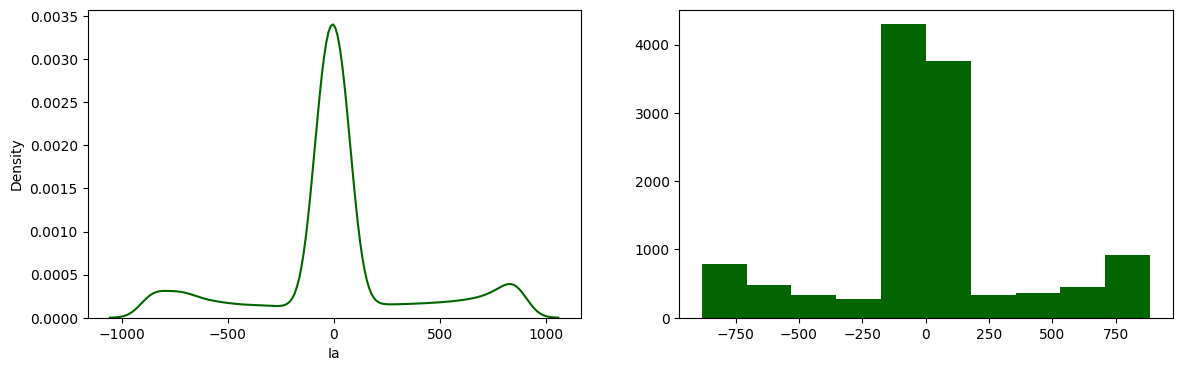

For Current Ib



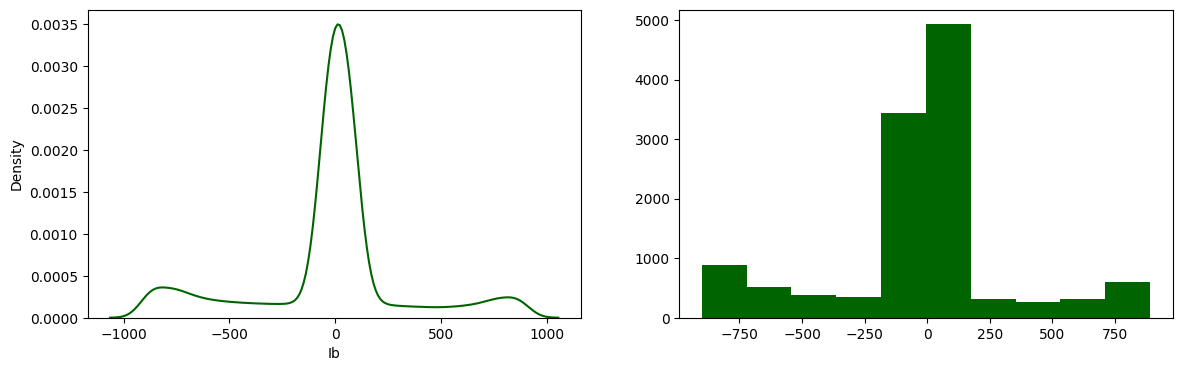

For Current Ic



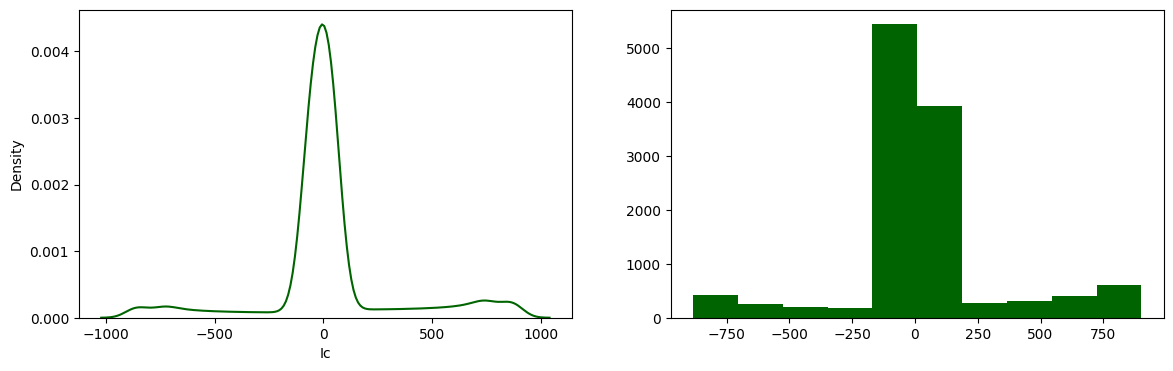

In [ ]:
for i,j in enumerate(training_set.columns[1:4]):

    print(f"For Current {j}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=training_set[j],color='darkgreen')

    plt.subplot(122)
    plt.hist(x=training_set[j],color='darkgreen')
    plt.show()

For Voltage Va



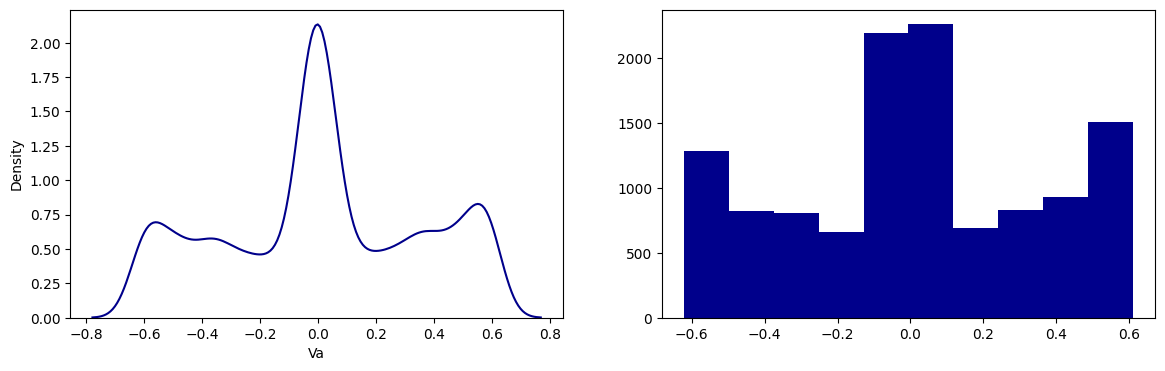

For Voltage Vb



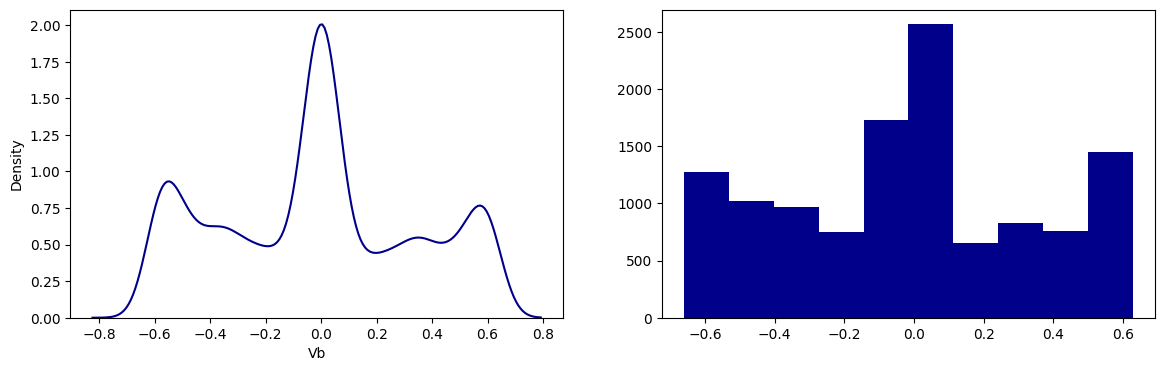

For Voltage Vc



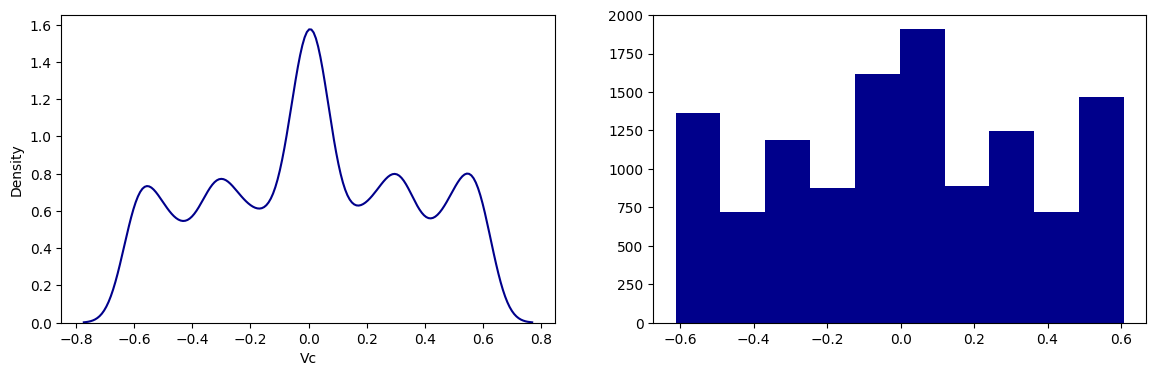

In [ ]:
for i,j in enumerate(training_set.columns[4:7]):
  print(f"For Voltage {j}\n")
  plt.subplots(1,2,figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(x = training_set[j],color='darkblue')

  plt.subplot(122)
  plt.hist(x = training_set[j],color='darkblue')
  plt.show()

In [ ]:
fig = px.line(training_set, x = "Ia", y = "Va", title="For Line A", color = "Output (S)")
fig.show()

In [ ]:
fig = px.line(training_set, x = "Ib", y = "Vb", title="For Line B", color = "Output (S)")
fig.show()

In [ ]:
fig = px.line(training_set, x = "Ic", y = "Vc", title="For Line C", color = "Output (S)")
fig.show()

In [ ]:
classification_set['fault_types'] = classification_set['G'].astype('str') + classification_set['C'].astype('str') + classification_set['B'].astype('str') + classification_set['A'].astype('str')
classification_set.head()

G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   

         Vc fault_types  
0 -0.267815        1001  
1 -0.189099        1001  
2 -0.151428        1001  
3 -0.130570        1001  
4 -0.113983        1001

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault
[0 1 1 0] -> LL fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG fault



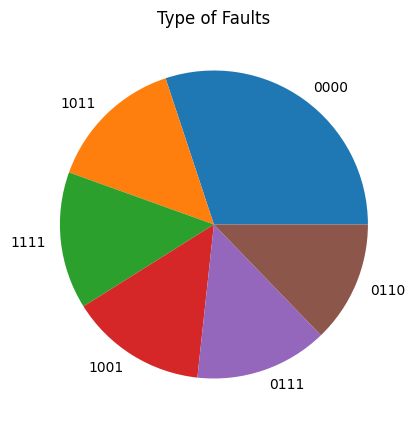

In [ ]:
print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault\n[0 1 1 0] -> LL fault\n[1 0 1 1] -> LLG Fault\n[0 1 1 1] -> LLL Fault\n[1 1 1 1] -> LLLG fault\n")
plt.figure(figsize=(8,5))
classification_set.fault_types.value_counts().plot.pie()
plt.title("Type of Faults")
plt.ylabel("")
plt.show()

In [ ]:
NF = classification_set[classification_set['fault_types']=='0000']
LG = classification_set[classification_set['fault_types']=='1001']
LL = classification_set[classification_set['fault_types']=='0110']
LLG = classification_set[classification_set['fault_types']=='1011']
LLL = classification_set[classification_set['fault_types']=='0111']
LLLG = classification_set[classification_set['fault_types']=='1111']

## **For No Fault**

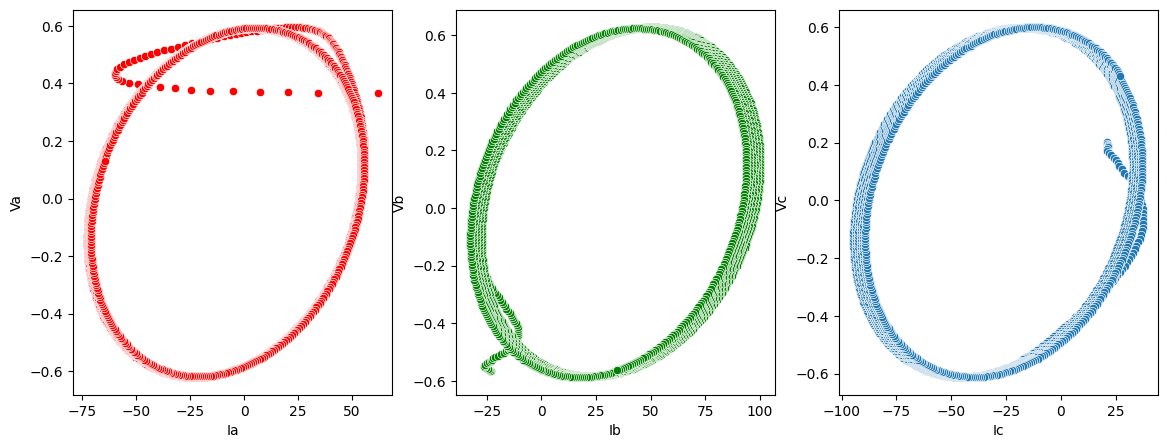

In [ ]:

plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=NF['Ia'],y=NF['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=NF['Ib'],y=NF['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=NF['Ic'],y=NF['Vc'])

# plt.tight_layout()
plt.show()

## Similarly, we will plot I v/s V for other classes:
## 2. Line to Ground Fault

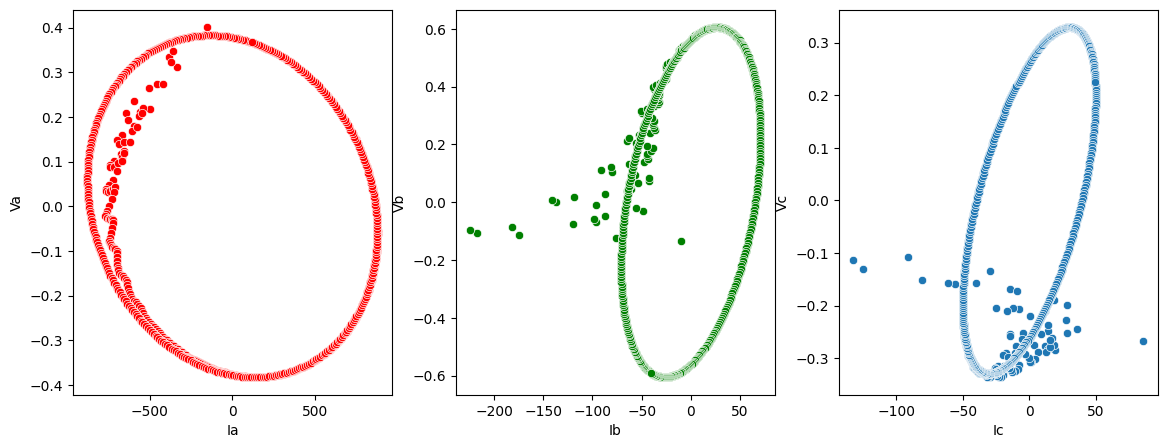

In [ ]:
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LG['Ia'],y=LG['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=LG['Ib'],y=LG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LG['Ic'],y=LG['Vc'])

# plt.tight_layout()
plt.show()

## 3. For Line to Line Faults:

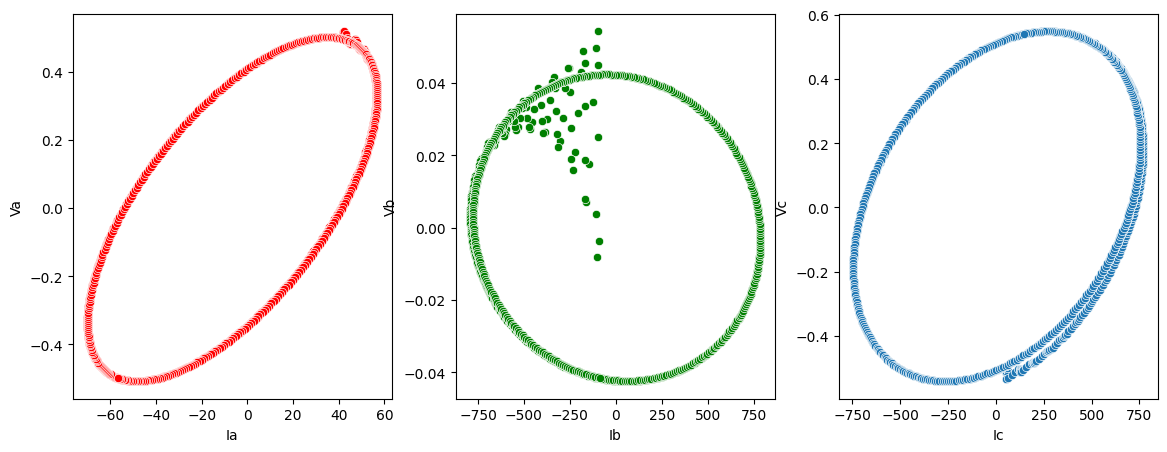

In [ ]:
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LL['Ia'],y=LL['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=LL['Ib'],y=LL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LL['Ic'],y=LL['Vc'])

# plt.tight_layout()
plt.show()

## 4. For Line Line Ground Faults:

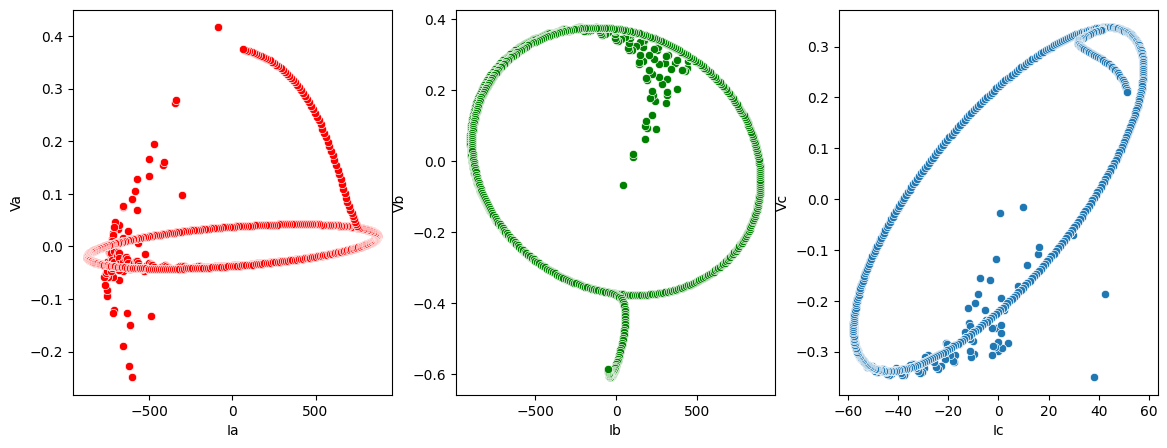

In [ ]:
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLG['Ia'],y=LLG['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=LLG['Ib'],y=LLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLG['Ic'],y=LLG['Vc'])

# plt.tight_layout()
plt.show()

### 5. For Line Line Line Fault:

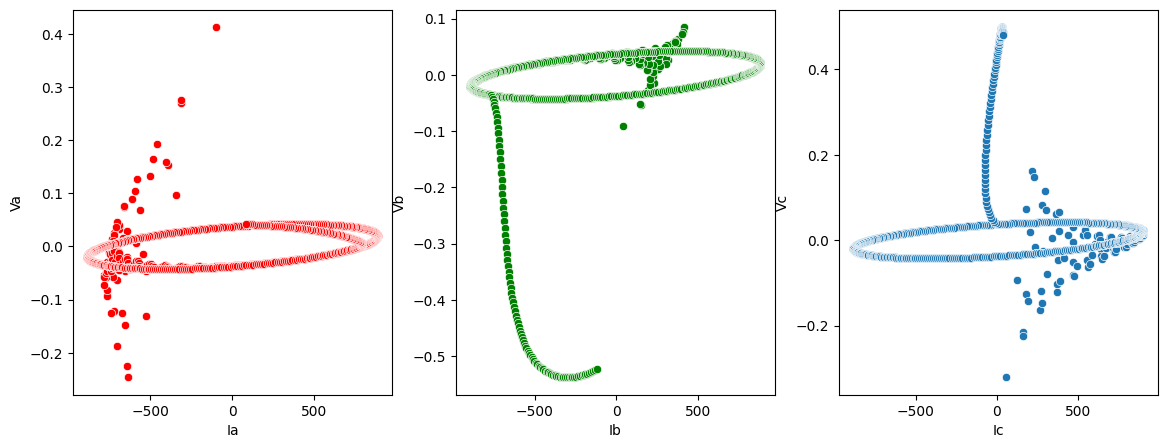

In [ ]:
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLL['Ia'],y=LLL['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=LLL['Ib'],y=LLL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLL['Ic'],y=LLL['Vc'])

# plt.tight_layout()
plt.show()

## 7. 6. For Line Line Line Ground Fault:

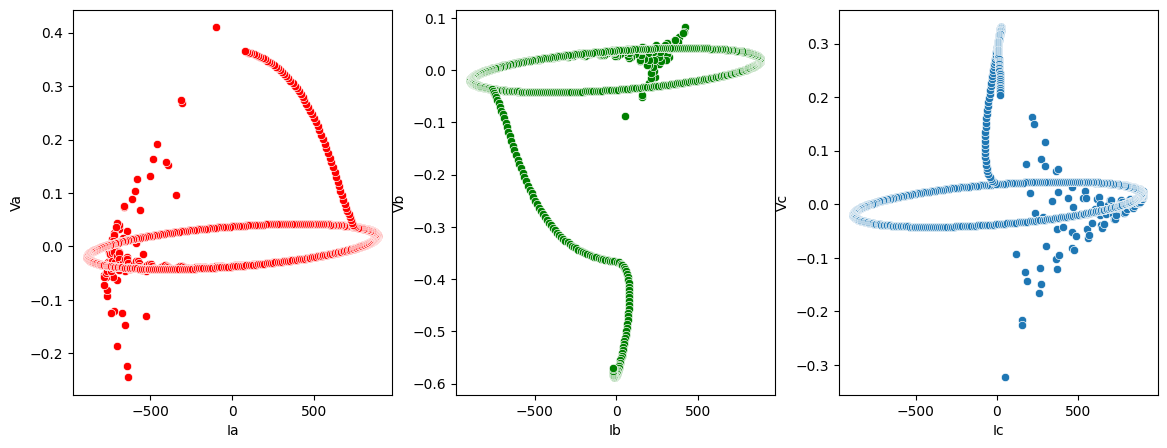

In [ ]:
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=LLLG['Ia'],y=LLLG['Va'],color='red')

plt.subplot(132)
sns.scatterplot(x=LLLG['Ib'],y=LLLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLLG['Ic'],y=LLLG['Vc'])

# plt.tight_layout()
plt.show()

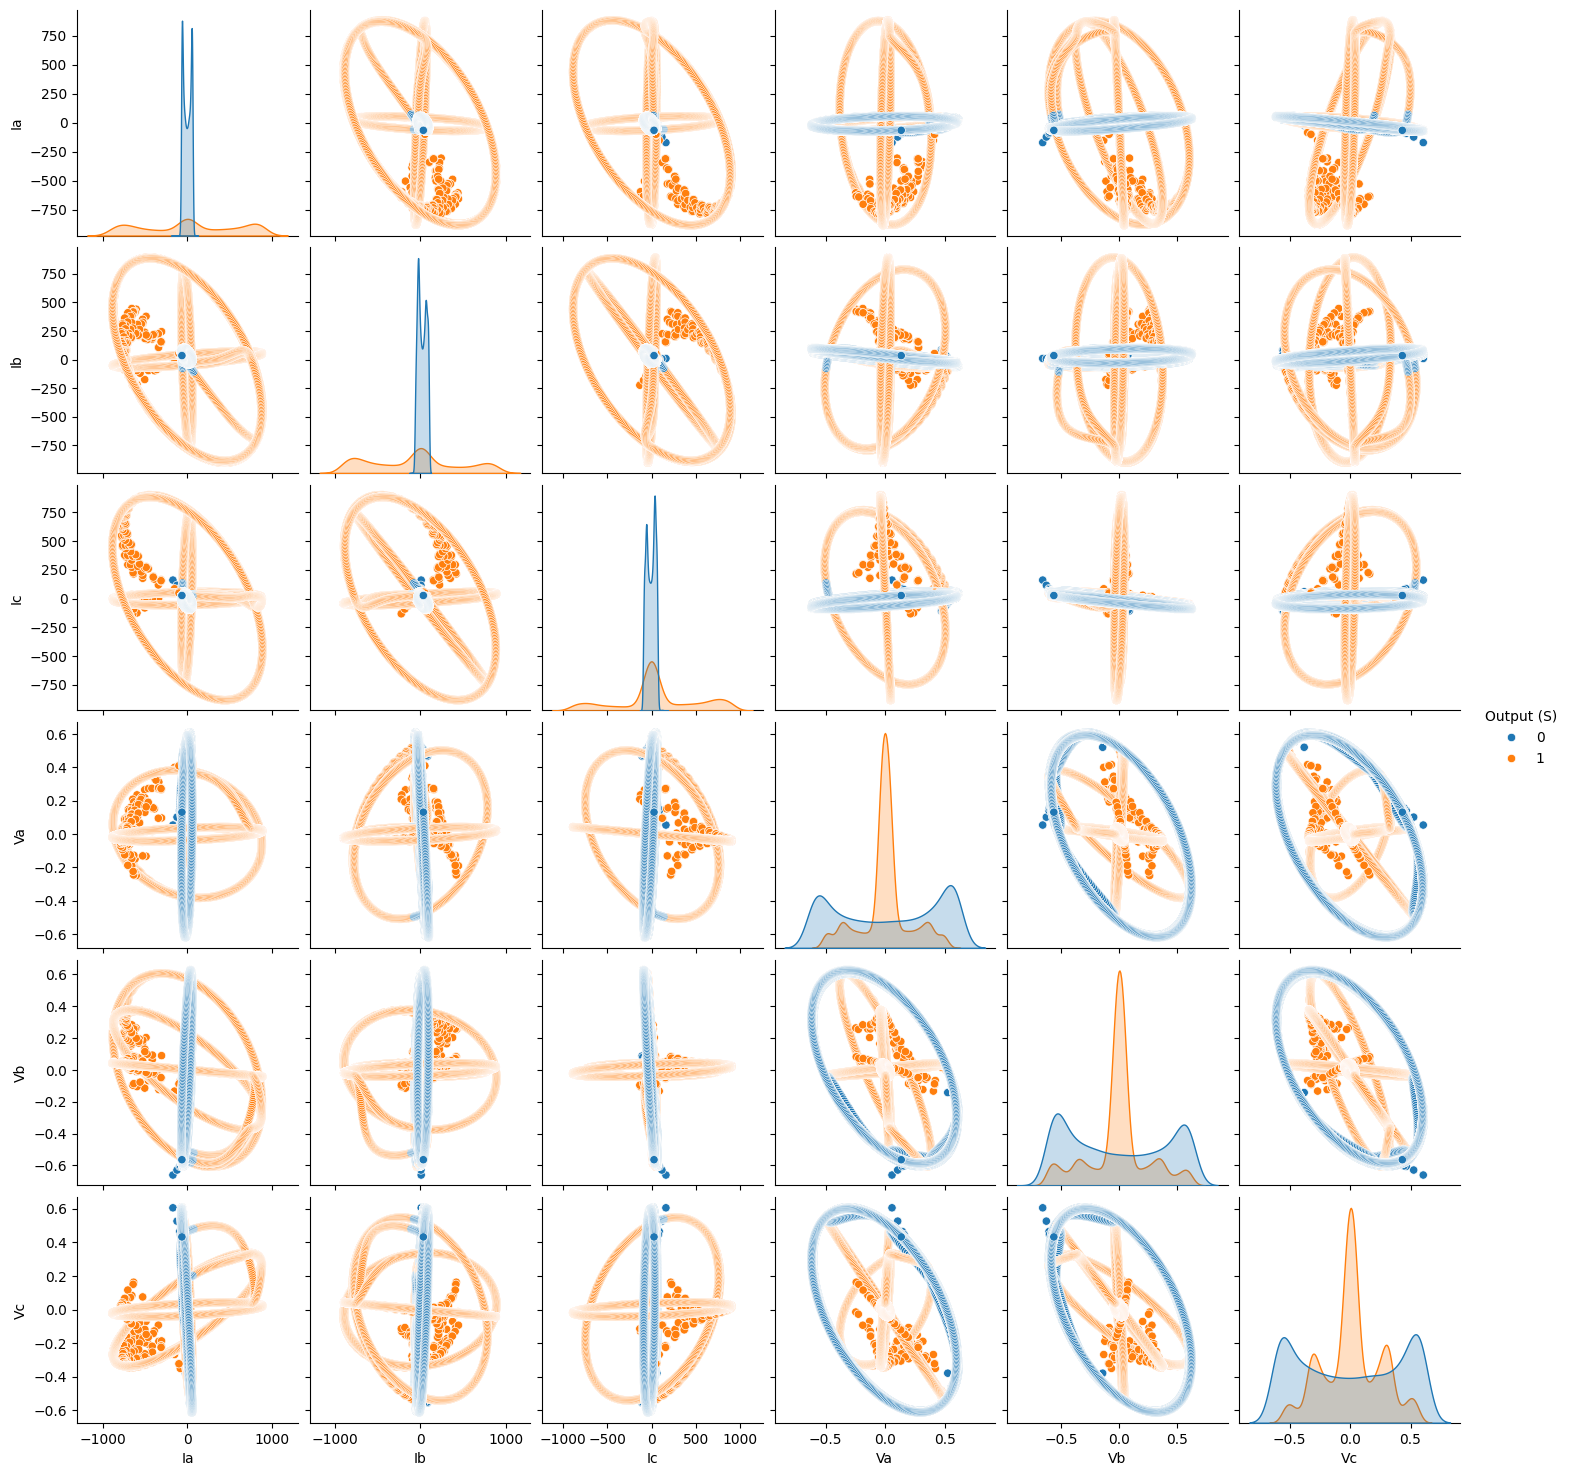

In [ ]:
sns.pairplot(training_set,hue='Output (S)')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn import metrics

As, the values provided in the dataset are nominal/per unit values for voltages, we are interested in the actual values. So, we multiply every voltage value with 11k. (As we assume the actual voltage flowing through the transmission line is 11KV)

In [ ]:
for i in ['Va','Vb','Vc']:
    training_set[i] = training_set[i]*11000

training_set.head()

Output (S)          Ia        Ib          Ic           Va           Vb  \
0           0 -170.472196  9.219613  161.252583   599.390044 -7259.130241   
1           0 -122.235754  6.168667  116.067087  1122.000000 -6914.727017   
2           0  -90.161474  3.813632   86.347841  1551.280808 -6658.045449   
3           0  -79.904916  2.398803   77.506112  1718.997027 -6624.588641   
4           0  -63.885255  0.590667   63.294587  1984.966313 -6506.515664   

            Vc  
0  6659.740208  
1  5788.217479  
2  5106.764641  
3  4905.591614  
4  4521.549351

In [ ]:
dip = training_set.drop(columns=['Output (S)'],axis=1)
dipc = dip.columns

mms = MinMaxScaler()
df_dip = mms.fit_transform(dip)

dip = pd.DataFrame(df_dip, columns=dipc)

In [ ]:
dop = training_set.iloc[:,0]

In [ ]:
dip.describe()

Ia            Ib            Ic            Va            Vb  \
count  12001.000000  12001.000000  12001.000000  12001.000000  12001.000000   
mean       0.503171      0.488143      0.507506      0.512969      0.500408   
std        0.213170      0.199653      0.169252      0.281340      0.277718   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.463009      0.474255      0.464407      0.311339      0.268831   
50%        0.497548      0.505608      0.494757      0.506426      0.506857   
75%        0.529800      0.541872      0.520349      0.736078      0.705548   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 Vc  
count  12001.000000  
mean       0.505908  
std        0.286065  
min        0.000000  
25%        0.273359  
50%        0.508694  
75%        0.739087  
max        1.000000

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(dip,dop,test_size=0.25,random_state=50)

In [ ]:
X_test

Ia        Ib        Ic        Va        Vb        Vc
8280   0.491091  0.551582  0.455470  0.004560  0.789557  0.713361
2162   0.532771  0.481091  0.481751  0.675674  0.811889  0.013382
6144   0.528704  0.484511  0.485703  0.792133  0.705925  0.007767
2524   0.092949  0.711813  0.493222  0.402071  0.733364  0.371973
7982   0.460696  0.531383  0.505898  0.474054  0.128008  0.937918
...         ...       ...       ...       ...       ...       ...
9444   0.532516  0.060028  0.906506  0.475038  0.511646  0.532286
8168   0.531885  0.499728  0.467060  0.623510  0.856997  0.018381
10585  0.529444  0.511619  0.454663  0.491205  0.936679  0.067688
5384   0.530846  0.214500  0.754611  0.705449  0.538566  0.271658
4101   0.511568  0.473151  0.514365  0.976370  0.390183  0.155099

[3001 rows x 6 columns]

### **SVM Model:**

Score: 0.9943377630121818


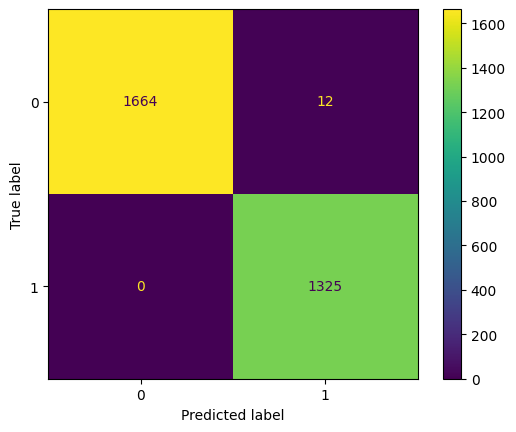

0.9978888888888889 0.996001332889037


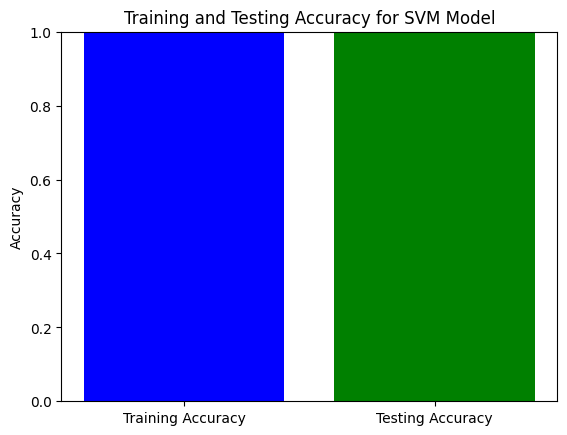

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

sv = SVC(C=1000)

sv.fit(X_train,Y_train)
scores = cross_val_score(sv, X_test, Y_test, cv=10)
print("Score:", np.mean(scores))

cm = confusion_matrix(Y_test, sv.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

training_accuracy = accuracy_score(Y_train, sv.predict(X_train))
testing_accuracy = accuracy_score(Y_test, sv.predict(X_test))

accuracy_data = [training_accuracy, testing_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']

print(training_accuracy,testing_accuracy)

plt.bar(labels, accuracy_data, color=['yellow', 'red'])
plt.title('Training and Testing Accuracy for SVM Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

In [ ]:
sv.predict(X_test)
sv.predict([[-643.663617,-224.159427,-132.282815,0.209537*11000,-0.095554*11000,-0.113983*11000]])
#Not working properly on second dataset.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])

Descision Tree Model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Score: 0.9913388704318937 



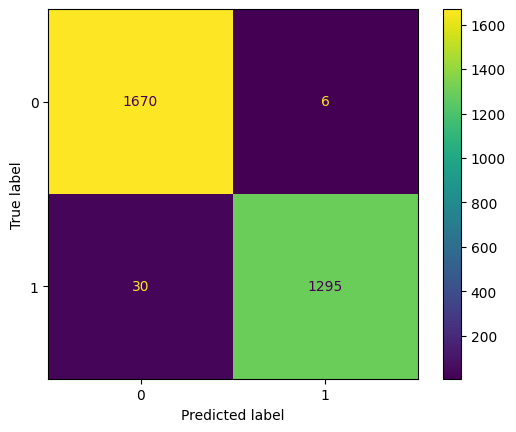

0.991 0.988003998667111


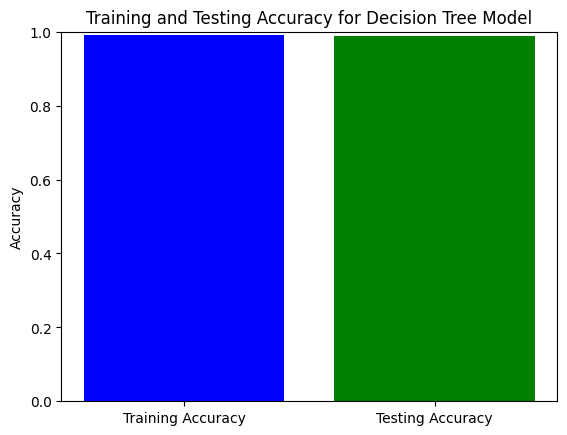

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.0012)

dtc.fit(X_train,Y_train)
scores = cross_val_score(dtc, X_test, Y_test, cv=10)
print("Score:", np.mean(scores),"\n")
cm = confusion_matrix(Y_test, dtc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

training_accuracy_dtc = accuracy_score(Y_train, dtc.predict(X_train))
testing_accuracy_dtc = accuracy_score(Y_test, dtc.predict(X_test))

accuracy_data_dtc = [training_accuracy_dtc, testing_accuracy_dtc]
labels_dtc = ['Training Accuracy', 'Testing Accuracy']
print(training_accuracy_dtc,testing_accuracy_dtc)

plt.bar(labels_dtc, accuracy_data_dtc, color=['yellow','red'])
plt.title('Training and Testing Accuracy for Decision Tree Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

Score: 0.9943377630121816 



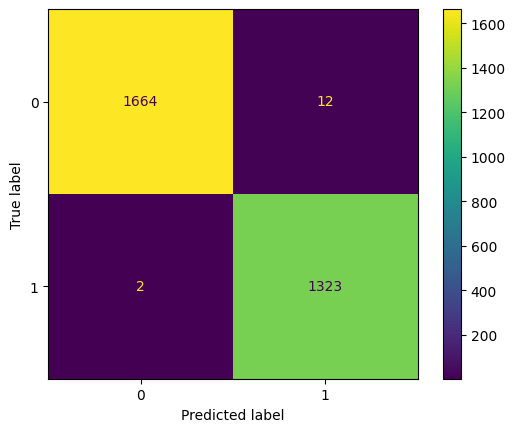

0.9983333333333333 0.9953348883705432


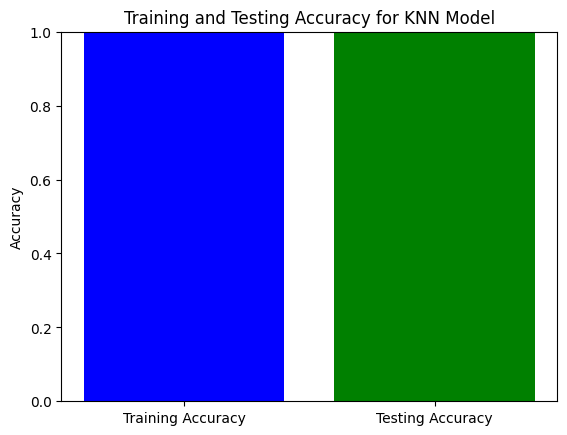

In [ ]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 5,p= 1)
knn.fit(X_train,Y_train)
scores = cross_val_score(knn, X_test, Y_test, cv=10)
print("Score:", np.mean(scores),"\n")
cm = confusion_matrix(Y_test,knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Create a new ConfusionMatrixDisplay object
disp.plot()
plt.show()

# Calculate training and testing accuracy for KNN
training_accuracy_knn = accuracy_score(Y_train, knn.predict(X_train))
testing_accuracy_knn = accuracy_score(Y_test, knn.predict(X_test))

# Create accuracy graph for KNN
accuracy_data_knn = [training_accuracy_knn, testing_accuracy_knn]
labels_knn = ['Training Accuracy', 'Testing Accuracy']
print(training_accuracy_knn,testing_accuracy_knn)
plt.bar(labels_knn, accuracy_data_knn, color=['yellow','red'])
plt.title('Training and Testing Accuracy for KNN Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:34:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




0.9993333333333333 0.9956681106297901


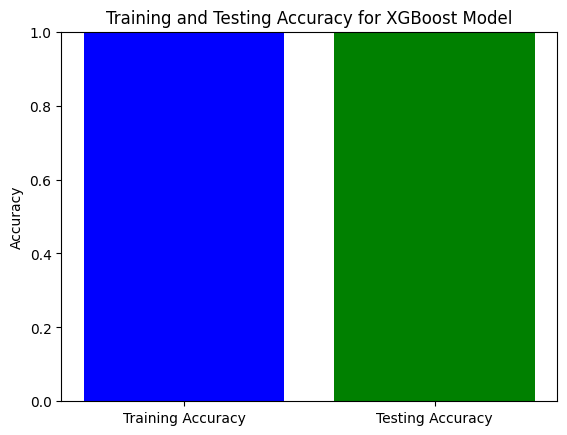

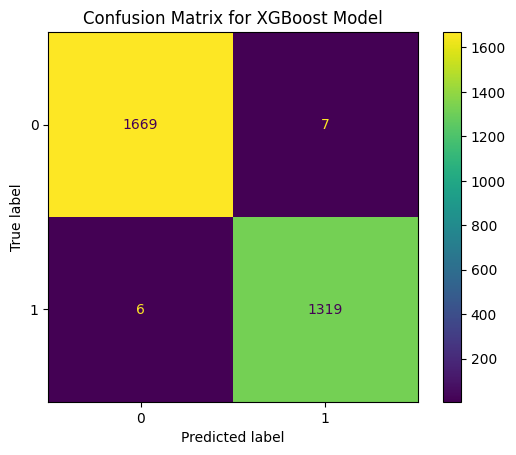

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate training and testing accuracy for XGBoost
training_accuracy_xgb = accuracy_score(Y_train, xgb_model.predict(X_train))
testing_accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(training_accuracy_xgb,testing_accuracy_xgb)
# Create accuracy graph for XGBoost
accuracy_data_xgb = [training_accuracy_xgb, testing_accuracy_xgb]
labels_xgb = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels_xgb, accuracy_data_xgb, color=['yellow','red'])
plt.title('Training and Testing Accuracy for XGBoost Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

# Display the confusion matrix
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

0.9998888888888889 0.9943352215928024


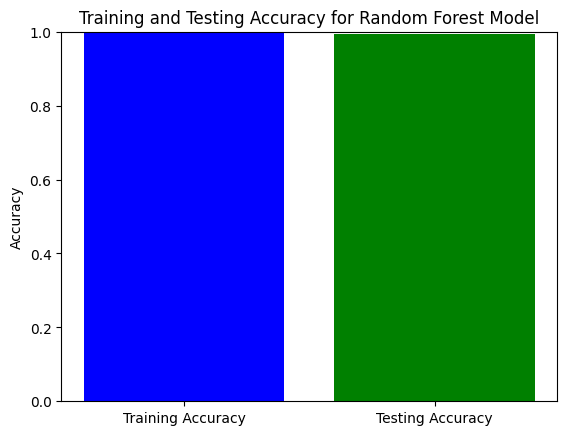

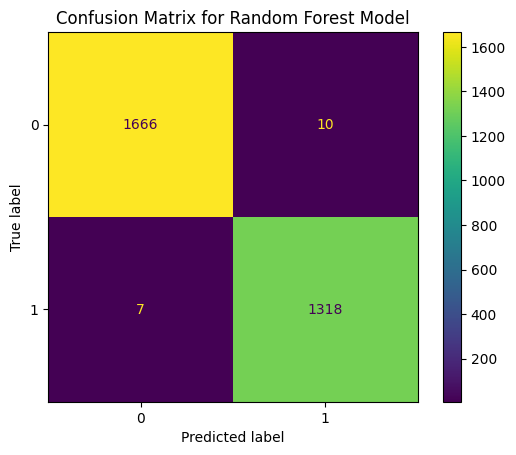

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)  # You can adjust hyperparameters
rf_model.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate training and testing accuracy for Random Forest
training_accuracy_rf = accuracy_score(Y_train, rf_model.predict(X_train))
testing_accuracy_rf = accuracy_score(Y_test, y_pred_rf)

# Create accuracy graph for Random Forest
accuracy_data_rf = [training_accuracy_rf, testing_accuracy_rf]
labels_rf = ['Training Accuracy', 'Testing Accuracy']

print(training_accuracy_rf,testing_accuracy_rf)
plt.bar(labels_rf, accuracy_data_rf, color=['yellow','red'])
plt.title('Training and Testing Accuracy for Random Forest Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

# Display the confusion matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## **Results show that SVM Model is predicting the best out of the other models!**

We have two things to do while performing fault classification. First, to classify whether there is a fault or not. And then if yes, which type of fault it is. so two models has to be made.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8496 - loss: 0.5264 - val_accuracy: 0.9630 - val_loss: 0.1191
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0941 - val_accuracy: 0.9827 - val_loss: 0.0716
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0585 - val_accuracy: 0.9823 - val_loss: 0.0486
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0459 - val_accuracy: 0.9853 - val_loss: 0.0402
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9870 - val_loss: 0.0340
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0318 - val_accuracy: 0.9887 - val_loss: 0.0349
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9855 - loss: 0.0392 - val_accuracy: 0.9930 - val_loss: 0.0408
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0326 - val_accu

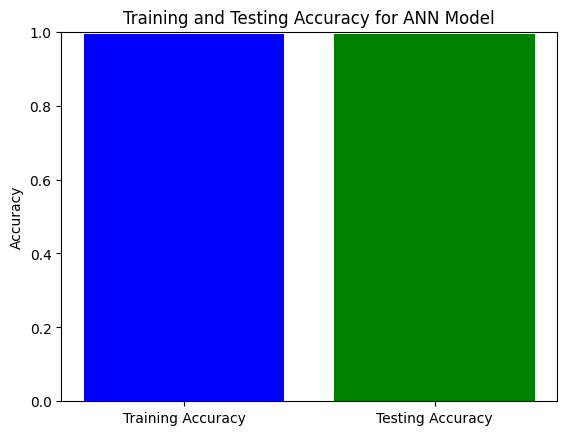

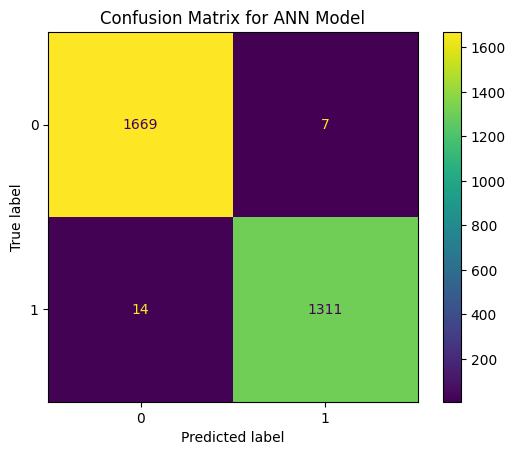

0.9945555555555555 0.9930023325558147


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8663 - loss: 6.9187 - val_accuracy: 0.9404 - val_loss: 2.6791
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9503 - loss: 1.2938 - val_accuracy: 0.9829 - val_loss: 0.0922
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9651 - loss: 0.7585 - val_accuracy: 0.9829 - val_loss: 0.2848
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9714 - loss: 0.3410 - val_accuracy: 0.9738 - val_loss: 0.3045
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9761 - loss: 0.1746 - val_accuracy: 0.9292 - val_loss: 0.4281
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.1438 - val_accuracy: 0.9825 - val_loss: 0.1815
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.1287 - val_accuracy: 0.9879 - val_loss: 0.0479
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0578 - val_accuracy: 0.9863 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6973 - loss: 0.5638 - val_accuracy: 0.8909 - val_loss: 0.3249
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9061 - loss: 0.2950 - val_accuracy: 0.9388 - val_loss: 0.2186
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9324 - loss: 0.2118 - val_accuracy: 0.9521 - val_loss: 0.1681
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9293 - loss: 0.1889 - val_accuracy: 0.9546 - val_loss: 0.1526
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9529 - loss: 0.1562 - val_accuracy: 0.9479 - val_loss: 0.1633
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9493 - loss: 0.1516 - val_accuracy: 0.9471 - val_loss: 0.1582
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9380 - loss: 0.1624 - val_accuracy: 0.9396 - val_loss: 0.1667
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9469 - loss: 0.1501 - val_accuracy: 

### First, we will make an ANN Model for fault classification in this. Then, we will make CNN Model and LSTM models.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
classification_set.iloc[:,0:4].values


array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(classification_set.iloc[:,4:].values, classification_set.iloc[:,0:4],test_size=0.2)

In [ ]:
np.sqrt(X_train.shape[0])


np.float64(79.29691040639604)

In [ ]:
k = 79

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=79)

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



[[1 1 1 1]
 [1 0 0 1]
 [0 0 0 0]
 ...
 [1 0 1 1]
 [1 0 0 1]
 [0 0 0 0]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9307056579783852

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)


NameError: name 'x_train' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
classification_set = pd.read_csv('/content/classData.csv')  # Replace with your correct path

# Select columns to normalize
columns_to_normalize = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform these columns
classification_set[columns_to_normalize] = scaler.fit_transform(classification_set[columns_to_normalize])



In [ ]:
X = classification_set.iloc[:,1:]
y = classification_set.iloc[:,0]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
# Reshape X_train to 2D before fitting the SVC model
X_train = X_train.reshape(X_train.shape[0], -1)

# Fit the SVC model
sv.fit(X_train, Y_train)

# ... (Rest of your code) ...

ValueError: Found input variables with inconsistent numbers of samples: [9600, 9000]

Score: 0.8550391034427156


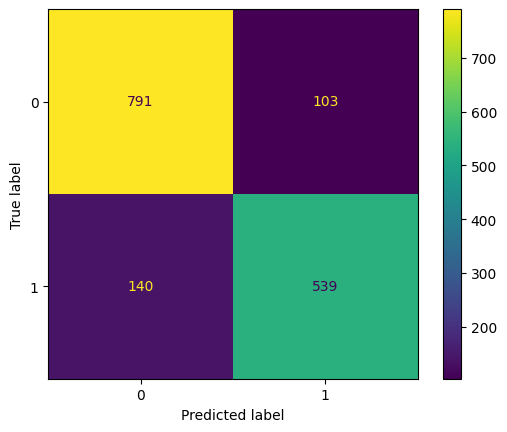

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sv = SVC(C=1000)

sv.fit(X_train,Y_train)
scores = cross_val_score(sv, X_test, Y_test, cv=10)
print("Score:", np.mean(scores))

cm = confusion_matrix(Y_test, sv.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Training Accuracy: 0.8847010178117048
Testing Accuracy: 0.87730451366815
Confusion Matrix for label G:


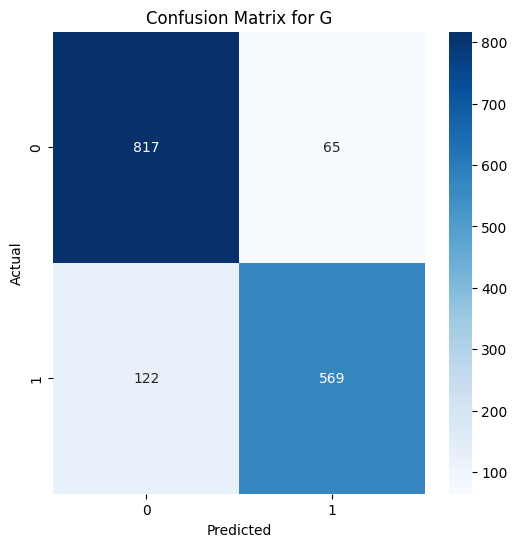

Confusion Matrix for label C:


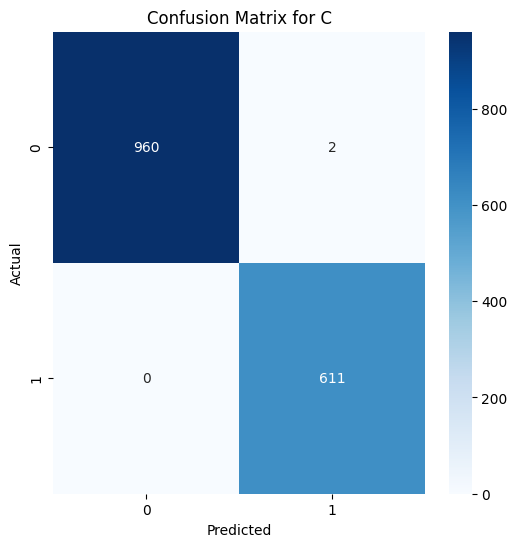

Confusion Matrix for label B:


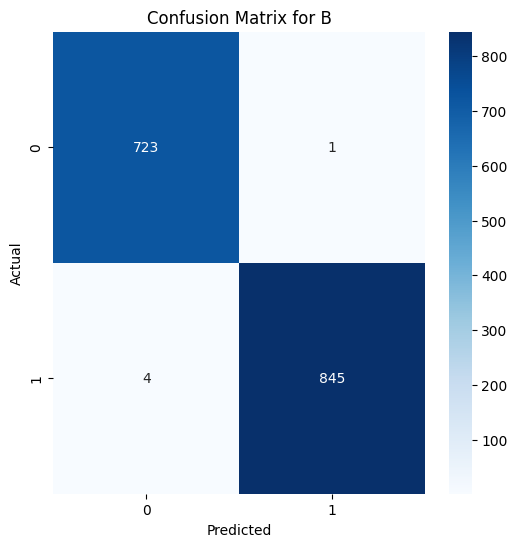

Confusion Matrix for label A:


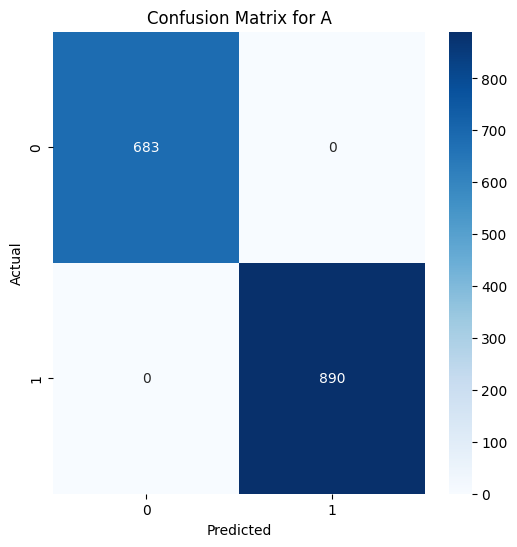

Overall Accuracy: 0.87730451366815


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
classification_set = pd.read_csv('/content/classData.csv')

# Normalize the features
columns_to_normalize = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
scaler = StandardScaler()
classification_set[columns_to_normalize] = scaler.fit_transform(classification_set[columns_to_normalize])

# Split the data into training and testing sets
X = classification_set[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]  # Features
y = classification_set[['G', 'C', 'B', 'A']]  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multi-label classifier
clf = OneVsRestClassifier(SVC(C=1000))  # Using SVC as the base estimator
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)  # Predictions on training data
training_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {training_accuracy}")
# Make predictions on the test set
y_pred = clf.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy}")

# Calculate and display confusion matrices for each label
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, label in enumerate(y_test.columns):
    print(f"Confusion Matrix for label {label}:")

    # Create a heatmap for the confusion matrix using seaborn
    plt.figure(figsize=(6, 6))  # Adjust figure size if needed
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])  # Customize cmap
    plt.title(f'Confusion Matrix for {label}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy}")

Testing Accuracy: 0.87730451366815
Training Accuracy: 0.8847010178117048


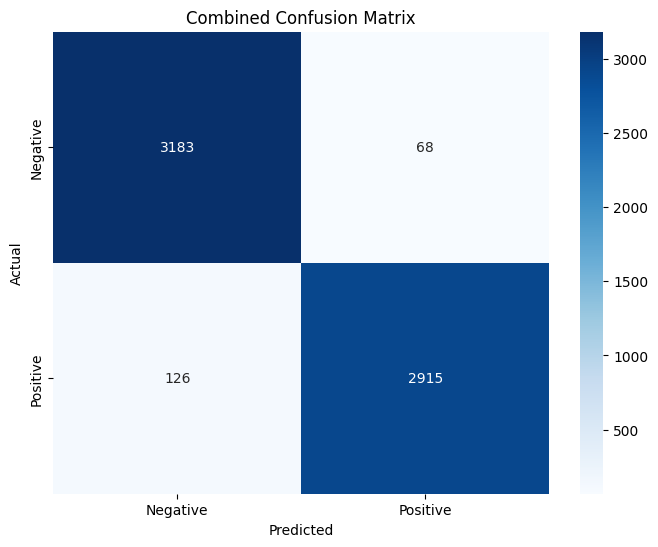

Overall Accuracy: 0.87730451366815


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
classification_set = pd.read_csv('/content/classData.csv')

# Normalize the features
columns_to_normalize = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
scaler = StandardScaler()
classification_set[columns_to_normalize] = scaler.fit_transform(
    classification_set[columns_to_normalize]
)

# Split the data into training and testing sets
X = classification_set[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]  # Features
y = classification_set[['G', 'C', 'B', 'A']]  # Labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the multi-label classifier
clf = OneVsRestClassifier(SVC(C=1000))  # Using SVC as the base estimator
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy}")

# Calculate and print training accuracy
y_pred_train = clf.predict(X_train)  # Predictions on training data
training_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {training_accuracy}")

# Calculate and display the combined 4x4 confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred)

# Initialize a 4x4 matrix to store the combined confusion matrix
combined_cm = np.zeros((2, 2), dtype=int)

# Sum up the values from individual confusion matrices
for i in range(len(cm)):
    # Check if the confusion matrix is 2x2
    if cm[i].shape == (2, 2):
        combined_cm += cm[i]
    else:
        print(f"Warning: Confusion matrix for label {y_test.columns[i]} is not 2x2. Skipping...")

# Display the combined confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(
    combined_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['Negative', 'Positive'], # Updated labels
    yticklabels=['Negative', 'Positive']  # Updated labels
)
plt.title('Combined Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate and print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:59:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Testing Accuracy (XGBoost): 0.8219961856325493
Confusion Matrix for label G:


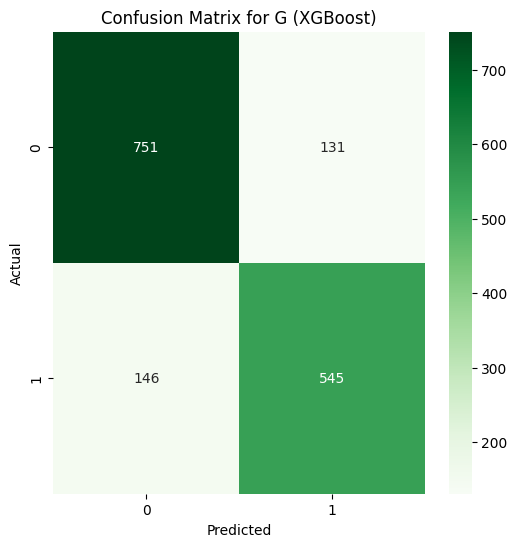

Confusion Matrix for label C:


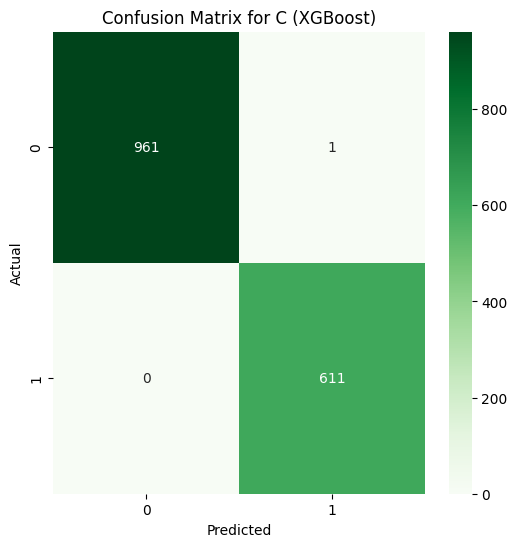

Confusion Matrix for label B:


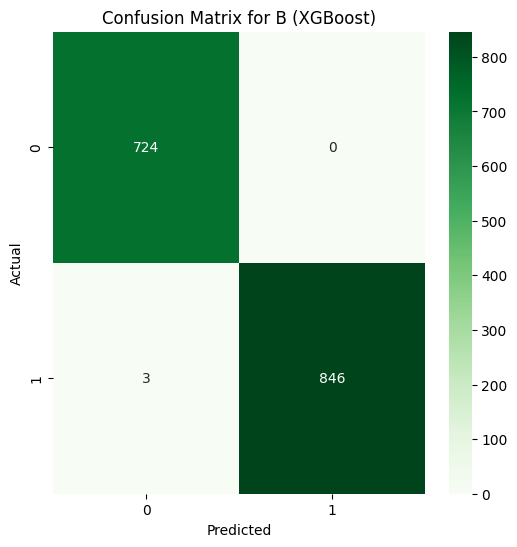

Confusion Matrix for label A:


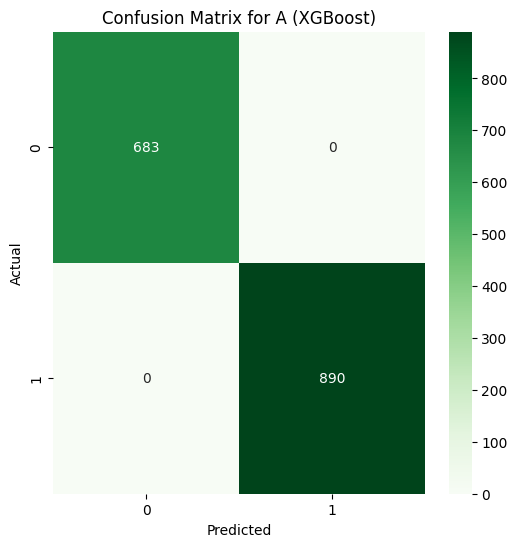

In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# Create and train the multi-label classifier with XGBoost
clf = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy (XGBoost): {accuracy}")

# Confusion matrices
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, label in enumerate(y_test.columns):
    print(f"Confusion Matrix for label {label}:")
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="Greens",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {label} (XGBoost)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Testing Accuracy (KNN): 0.8054672600127145
Confusion Matrix for label G:


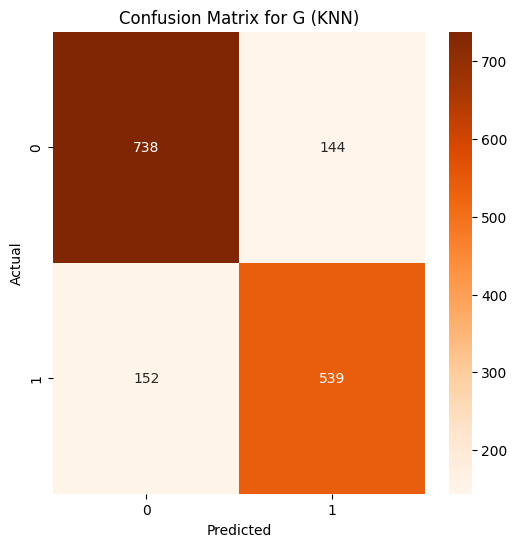

Confusion Matrix for label C:


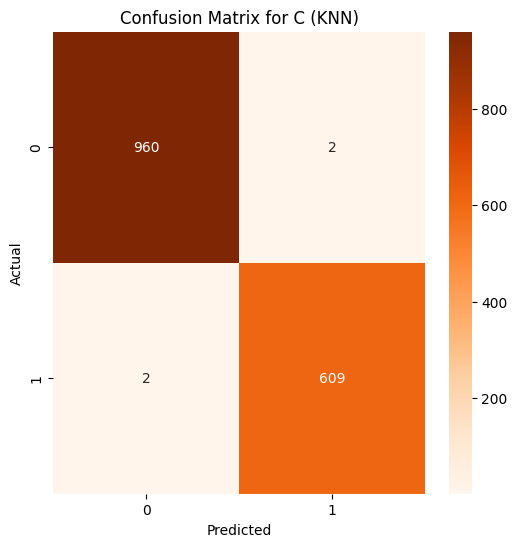

Confusion Matrix for label B:


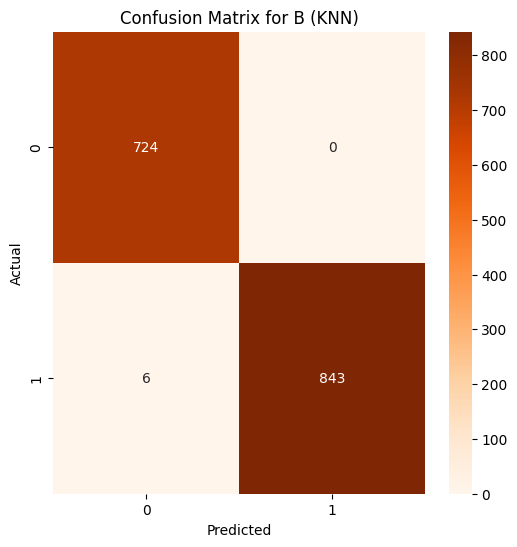

Confusion Matrix for label A:


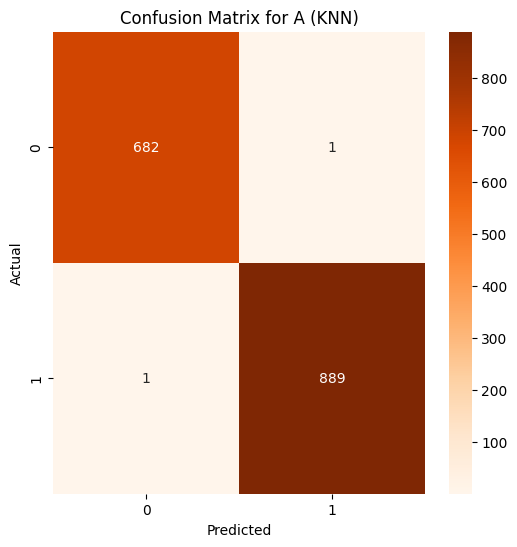

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the multi-label classifier with KNN
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy (KNN): {accuracy}")

# Confusion matrices
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, label in enumerate(y_test.columns):
    print(f"Confusion Matrix for label {label}:")
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="Oranges",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {label} (KNN)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Testing Accuracy (Random Forest): 0.8836617927527018
Confusion Matrix for label G:


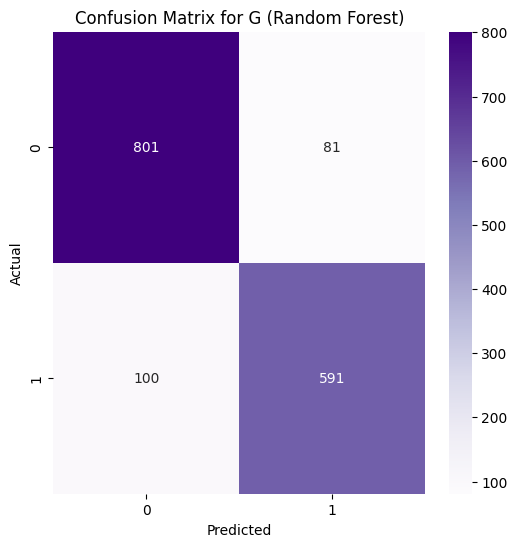

Confusion Matrix for label C:


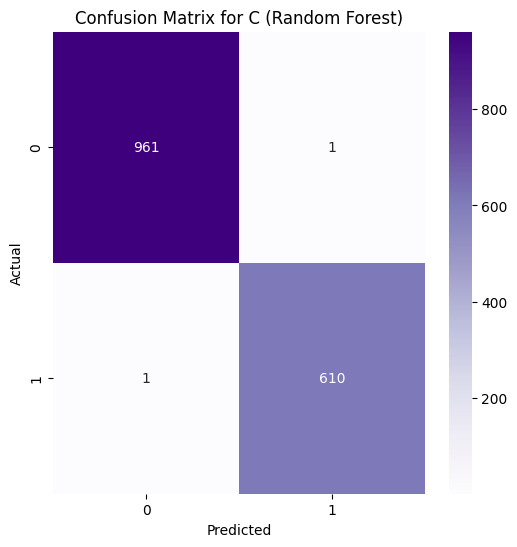

Confusion Matrix for label B:


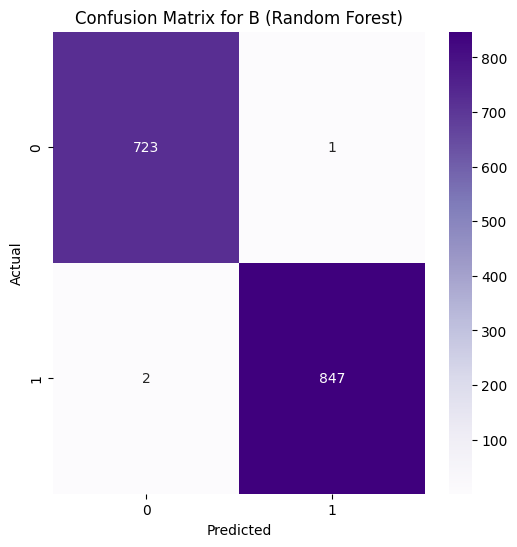

Confusion Matrix for label A:


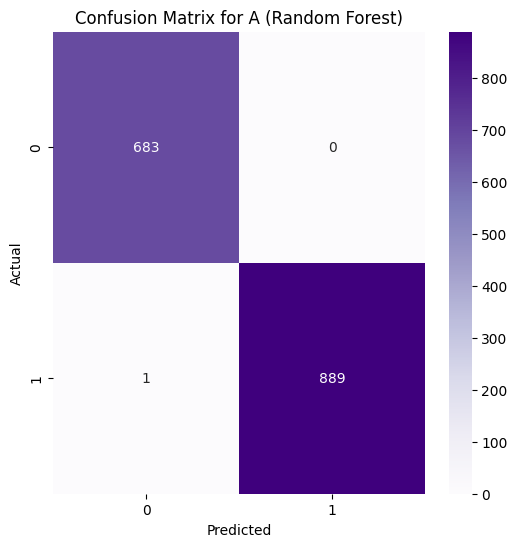

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the multi-label classifier with Random Forest
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy (Random Forest): {accuracy}")

# Confusion matrices
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, label in enumerate(y_test.columns):
    print(f"Confusion Matrix for label {label}:")
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="Purples",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {label} (Random Forest)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Testing Accuracy (Decision Tree): 0.8995549904640814
Confusion Matrix for label G:


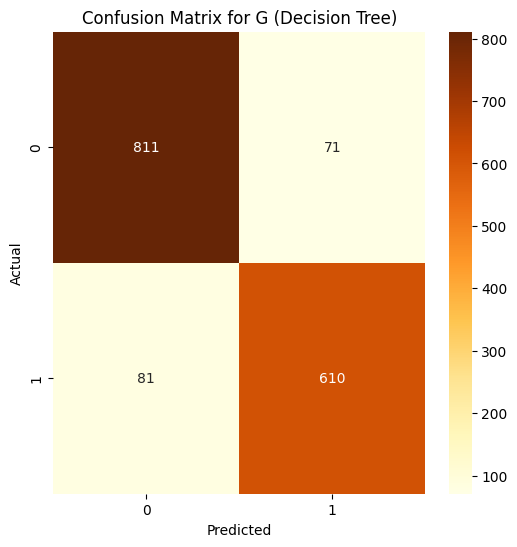

Confusion Matrix for label C:


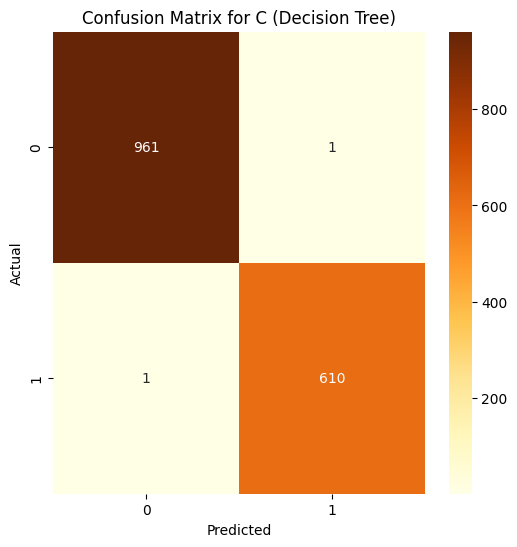

Confusion Matrix for label B:


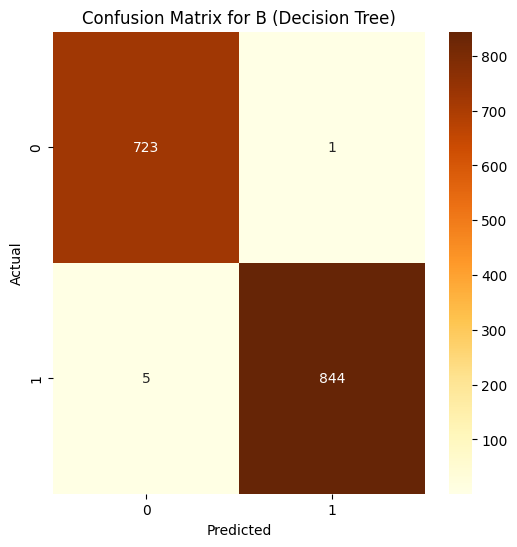

Confusion Matrix for label A:


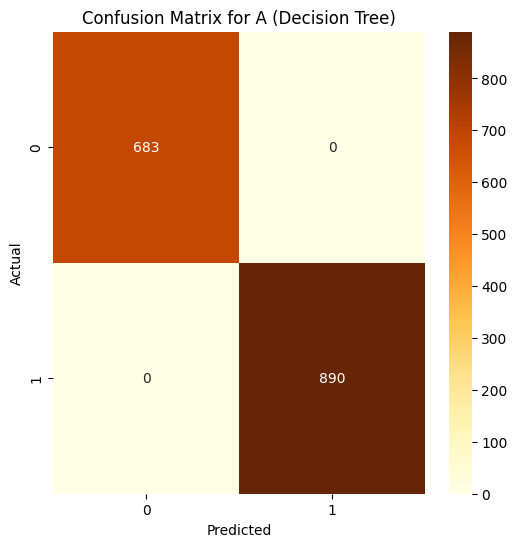

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# Create and train the multi-label classifier with Decision Tree
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy (Decision Tree): {accuracy}")

# Confusion matrices with yellow color map
cm = multilabel_confusion_matrix(y_test, y_pred)
for i, label in enumerate(y_test.columns):
    print(f"Confusion Matrix for label {label}:")
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm[i], annot=True, fmt="d", cmap="YlOrBr",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {label} (Decision Tree)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
